In [6]:
cd /Users/sarahbennett/Desktop/SROPproject/data/raw

/Users/sarahbennett/Desktop/SROPproject/data/raw


In [5]:
import pandas as pd

In [170]:
# read file containing cell morphology labels by channel
df_channel_labels = pd.read_csv('gene_channel_labels.csv')

# read file containing L1000 expression values
df1000 = pd.read_csv('TAORF-L1000-profiles.csv')

## add channel labels to df1000

In [173]:
# create dictionaries for each channel and their labels

mito_dict = {}
er_dict = {}
rna_dict = {}
agp_dict = {}
dna_dict = {}

# make gene IDs the index
df_channel_labels.index = df_channel_labels['NCBIGeneID']

# add gene IDs and their corresponding labels to channel dictionaries
for gene_id in df_channel_labels['NCBIGeneID']:
    mito_dict[gene_id] = df_channel_labels.loc[gene_id, 'Mito']
    er_dict[gene_id] = df_channel_labels.loc[gene_id, 'ER']
    rna_dict[gene_id] = df_channel_labels.loc[gene_id, 'RNA']
    agp_dict[gene_id] = df_channel_labels.loc[gene_id, 'AGP']
    dna_dict[gene_id] = df_channel_labels.loc[gene_id, 'DNA']

# fix gene id 5604
mito_dict[5604] = 'Negative'
er_dict[5604] = 'Negative'
rna_dict[5604] = 'Negative'
agp_dict[5604] = 'Negative'
dna_dict[5604] = 'Negative'

# create ordered lists that will form new columns for channel labels in the df1000 dataframe
mito_col = []
er_col =[]
rna_col = []
agp_col = []
dna_col = []

for gene_id in df1000['NCBIGeneID']:
    mito_col.append(mito_dict[gene_id])
    er_col.append(er_dict[gene_id])
    rna_col.append(rna_dict[gene_id])
    agp_col.append(agp_dict[gene_id])
    dna_col.append(dna_dict[gene_id])
    
# add columns to L1000 dataframe using lists
df1000['Mito'] = mito_col
df1000['ER'] = er_col
df1000['RNA'] = rna_col
df1000['AGP'] = agp_col
df1000['DNA'] = dna_col

In [174]:
# drop metadata columms from df1000

df1000 = df1000.drop(['Symbol', 'PERT', 'NCBIGeneID'], axis=1)
df1000 = df1000.iloc[: , 1:]

In [175]:
df1000

,200814_at,218597_s_at,217140_s_at,209253_at,214404_x_at,222103_at,219888_at,207042_at,201453_x_at,203627_at,...,203341_at,202801_at,217398_x_at,205379_at,203897_at,Mito,ER,RNA,AGP,DNA
0,-1.194166,2.238077,0.754850,-0.640921,0.225559,-1.111680,0.703980,0.018659,0.814155,-1.695314,...,2.158755,0.688564,-0.601384,0.416310,0.120169,Positive,Inteterminate,Positive,Positive,Positive
1,-0.428187,4.087896,-0.299040,-0.999700,-0.150459,-0.613517,-0.805364,-0.143298,1.941700,-0.892734,...,2.283062,-0.098673,-0.528639,0.745521,-0.288377,Positive,Inteterminate,Positive,Positive,Positive
2,-0.815360,-0.810061,-0.602760,0.581827,0.634038,0.388235,-0.194279,-0.445199,-0.125401,-0.840656,...,0.320008,-0.543859,0.014386,0.413323,-1.589552,Negative,Negative,Inteterminate,Inteterminate,Inteterminate
3,0.438179,0.589533,-0.301783,0.456332,-0.452433,-1.132039,0.096753,0.574507,-1.021346,-0.116544,...,1.577006,-0.901837,-2.323484,0.139007,-0.204410,Negative,Inteterminate,Inteterminate,Negative,Inteterminate
4,1.324805,0.417802,-0.574241,-0.523841,0.374933,-0.527300,1.349799,-0.279269,0.769099,0.863793,...,-0.545885,0.296013,0.672973,0.335795,-0.077003,Negative,Negative,Negative,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-3.560181,-0.421909,0.574199,-1.519981,0.310194,0.402478,-0.250534,-0.633151,0.270123,0.378386,...,0.969483,-1.900724,0.101624,-0.996339,1.016759,Inteterminate,Inteterminate,Positive,Positive,Positive
106,0.453492,-0.458457,0.418105,0.409033,-1.282272,0.434436,0.098657,-0.325570,-0.324222,1.333953,...,-0.378609,-0.232731,-0.210868,1.654396,-1.702774,Negative,Negative,Negative,Negative,Negative
107,0.350350,-0.180406,0.574199,-0.632350,0.488848,-0.290078,-0.368665,-0.828274,0.149175,0.771801,...,0.241553,-1.836583,0.101624,-0.322154,0.700116,Negative,Negative,Negative,Inteterminate,Inteterminate
108,-0.501228,1.028693,-0.270585,0.918863,0.071601,-0.519173,0.509177,0.357433,0.309065,-1.902984,...,-1.103897,0.865213,0.702430,-0.178327,0.998305,Positive,Inteterminate,Positive,Positive,Positive


## make channel-specific dataframes by getting rid of indeterminate rows

In [176]:
# create list of index numbers of mito rows that are indeterminate
mito_drop = []
index = 0
for label in df1000['Mito']:
    if label == 'Inteterminate':
        mito_drop.append(index)
    index += 1

# create list of index numbers of mito rows that are indeterminate
er_drop = []
index = 0
for label in df1000['ER']:
    if label == 'Inteterminate':
        er_drop.append(index)
    index += 1

# create list of index numbers of rna rows that are indeterminate
rna_drop = []
index = 0
for label in df1000['RNA']:
    if label == 'Inteterminate':
        rna_drop.append(index)
    index += 1
    
# create list of index numbers of mito rows that are indeterminate
agp_drop = []
index = 0
for label in df1000['AGP']:
    if label == 'Inteterminate':
        agp_drop.append(index)
    index += 1
    
# create list of index numbers of mito rows that are indeterminate
dna_drop = []
index = 0
for label in df1000['DNA']:
    if label == 'Inteterminate':
        dna_drop.append(index)
    index += 1

### mito

In [180]:
# make new mito dataframe without indeterminate rows
df1000_mito = df1000.drop('RNA', axis=1).drop('ER', axis=1).drop('AGP', axis=1).drop('DNA', axis=1)
df1000_mito = df1000_mito.drop(index = mito_drop, axis=0)
df1000_mito=df1000_mito.reset_index()
df1000_mito = df1000_mito.drop('index', axis=1)

# split data into features(X) and target(y)
X_mito = df1000_mito.drop('Mito', axis=1)
y_mito = df1000_mito['Mito']

# convert target variables to binary
label_encoder = LabelEncoder()
y_mito_binary = label_encoder.fit_transform(y_mito)

### er

In [181]:
# make new ER dataframe without indeterminate rows
df1000_er = df1000.drop('Mito', axis=1).drop('RNA', axis=1).drop('AGP', axis=1).drop('DNA', axis=1)
df1000_er = df1000_er.drop(index = er_drop, axis=0)
df1000_er = df1000_er.reset_index()
df1000_er = df1000_er.drop('index', axis=1)

# split data into features(X) and target(y)
X_er = df1000_er.drop('ER', axis=1)
y_er = df1000_er['ER']

# convert target variables to binary
label_encoder = LabelEncoder()
y_er_binary = label_encoder.fit_transform(y_er)

### rna

In [182]:
# make new RNA dataframe without indeterminate rows
df1000_rna = df1000.drop('Mito', axis=1).drop('ER', axis=1).drop('AGP', axis=1).drop('DNA', axis=1)
df1000_rna = df1000_rna.drop(index = rna_drop, axis=0)
df1000_rna = df1000_rna.reset_index()
df1000_rna = df1000_rna.drop('index', axis=1)

# split data into features(X) and target(y)
X_rna = df1000_rna.drop('RNA', axis=1)
y_rna = df1000_rna['RNA']

# convert target variables to binary
label_encoder = LabelEncoder()
y_rna_binary = label_encoder.fit_transform(y_rna)

### agp

In [183]:
# make new AGP dataframe without indeterminate rows
df1000_agp = df1000.drop('Mito', axis=1).drop('ER', axis=1).drop('RNA', axis=1).drop('DNA', axis=1)
df1000_agp = df1000_agp.drop(index = agp_drop, axis=0)
df1000_agp = df1000_agp.reset_index()
df1000_agp = df1000_agp.drop('index', axis=1)

# split data into features(X) and target(y)
X_agp = df1000_agp.drop('AGP', axis=1)
y_agp = df1000_agp['AGP']

# convert target variables to binary
label_encoder = LabelEncoder()
y_agp_binary = label_encoder.fit_transform(y_agp)

### dna

In [184]:
# make new DNA dataframe without indeterminate rows
df1000_dna = df1000.drop('Mito', axis=1).drop('ER', axis=1).drop('RNA', axis=1).drop('AGP', axis=1)
df1000_dna = df1000_dna.drop(index = dna_drop, axis=0)
df1000_dna = df1000_dna.reset_index()
df1000_dna = df1000_dna.drop('index', axis=1)

# split data into features(X) and target(y)
X_dna = df1000_dna.drop('DNA', axis=1)
y_dna = df1000_dna['DNA']

# convert target variables to binary
label_encoder = LabelEncoder()

# random forest for RNA, AGP, and DNA

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, StratifiedKFold, train_test_split
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt

In [186]:
# assign model and cross validation for all channels
rf = RandomForestClassifier(n_estimators=1000)
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

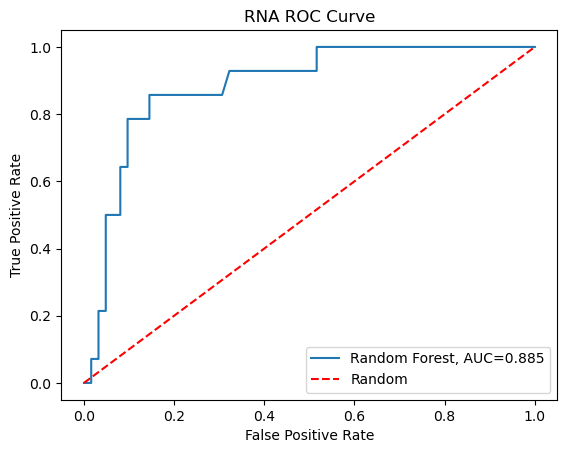

In [142]:
# for rna
r_rf_probs = cross_val_predict(rf, X_rna, y_rna_binary, cv=cv, method='predict_proba')
r_rf_probs = r_rf_probs[:, 1]
r_rf_fpr, r_rf_tpr, _ = roc_curve(y_rna_binary, r_rf_probs)
r_rf_auc = auc(r_rf_fpr, r_rf_tpr)

plt.plot(r_rf_fpr, r_rf_tpr, label='Random Forest, AUC='+str(round(r_rf_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNA ROC Curve')
plt.legend()
plt.show()

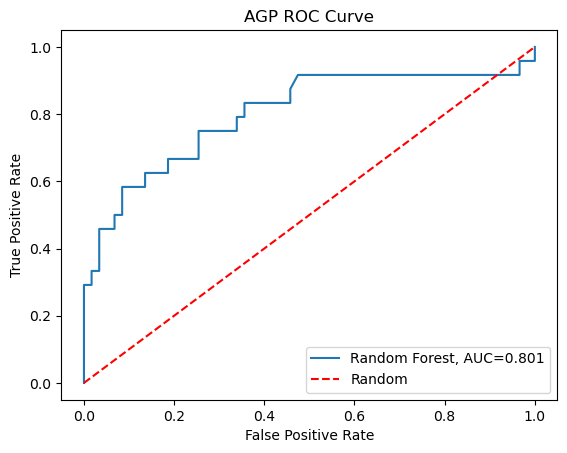

In [139]:
# for agp
a_rf_probs = cross_val_predict(rf, X_agp, y_agp_binary, cv=cv, method='predict_proba')
a_rf_probs = a_rf_probs[:, 1]
a_rf_fpr, a_rf_tpr, _ = roc_curve(y_agp_binary, a_rf_probs)
a_rf_auc = auc(a_rf_fpr, a_rf_tpr)

plt.plot(a_rf_fpr, a_rf_tpr, label='Random Forest, AUC='+str(round(a_rf_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AGP ROC Curve')
plt.legend()
plt.show()

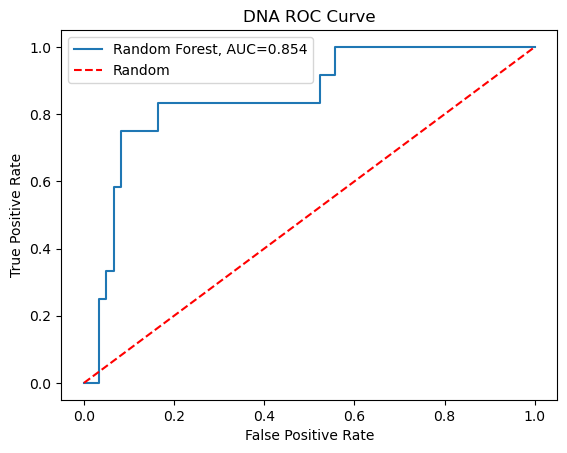

In [136]:
# for dna
d_rf_probs = cross_val_predict(rf, X_dna, y_dna_binary, cv=cv, method='predict_proba')
d_rf_probs = d_rf_probs[:, 1]
d_rf_fpr, d_rf_tpr, _ = roc_curve(y_dna_binary, d_rf_probs)
d_rf_auc = auc(d_rf_fpr, d_rf_tpr)

plt.plot(d_rf_fpr, d_rf_tpr, label='Random Forest, AUC='+str(round(d_rf_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNA ROC Curve')
plt.legend()
plt.show()

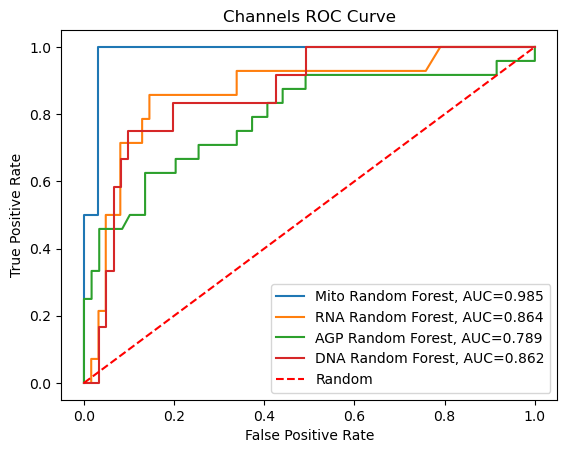

In [99]:
# plot all curves on same graph

plt.plot(m_rf_fpr, m_rf_tpr, label='Mito Random Forest, AUC='+str(round(m_rf_auc, 3)))
plt.plot(r_rf_fpr, r_rf_tpr, label='RNA Random Forest, AUC='+str(round(r_rf_auc, 3)))
plt.plot(a_rf_fpr, a_rf_tpr, label='AGP Random Forest, AUC='+str(round(a_rf_auc, 3)))
plt.plot(d_rf_fpr, d_rf_tpr, label='DNA Random Forest, AUC='+str(round(d_rf_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Channels ROC Curve')
plt.legend()
plt.show()

# logistic regression for RNA, AGP, and DNA

In [188]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [187]:
# assign model and cross validation
lr = LogisticRegression(random_state=16)
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

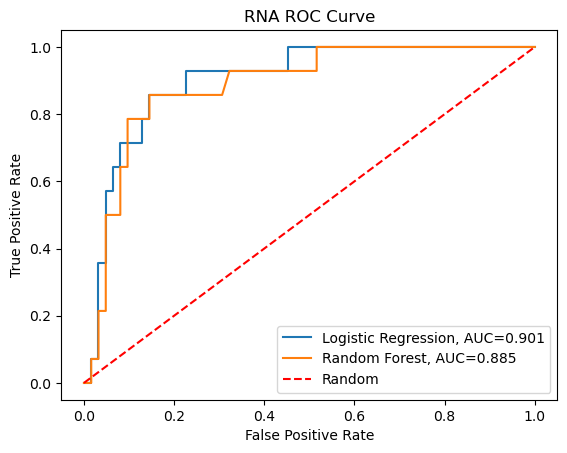

In [143]:
# rna
r_lr_probs = cross_val_predict(lr, X_rna, y_rna_binary, cv=cv, method='predict_proba')
r_lr_probs = r_lr_probs[:, 1]
r_lr_fpr, r_lr_tpr, _ = roc_curve(y_rna_binary, r_lr_probs)
r_lr_auc = auc(r_lr_fpr, r_lr_tpr)

plt.plot(r_lr_fpr, r_lr_tpr, label='Logistic Regression, AUC='+str(round(r_lr_auc, 3)))
plt.plot(r_rf_fpr, r_rf_tpr, label='Random Forest, AUC='+str(round(r_rf_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNA ROC Curve')
plt.legend()
plt.show()

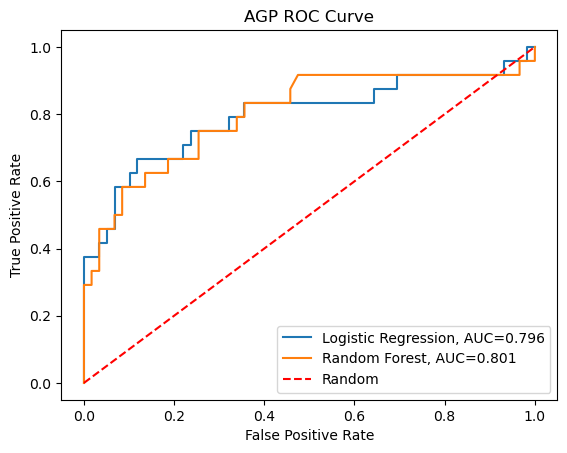

In [140]:
# agp
a_lr_probs = cross_val_predict(lr, X_agp, y_agp_binary, cv=cv, method='predict_proba')
a_lr_probs = a_lr_probs[:, 1]
a_lr_fpr, a_lr_tpr, _ = roc_curve(y_agp_binary, a_lr_probs)
a_lr_auc = auc(a_lr_fpr, a_lr_tpr)

plt.plot(a_lr_fpr, a_lr_tpr, label='Logistic Regression, AUC='+str(round(a_lr_auc, 3)))
plt.plot(a_rf_fpr, a_rf_tpr, label='Random Forest, AUC='+str(round(a_rf_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AGP ROC Curve')
plt.legend()
plt.show()

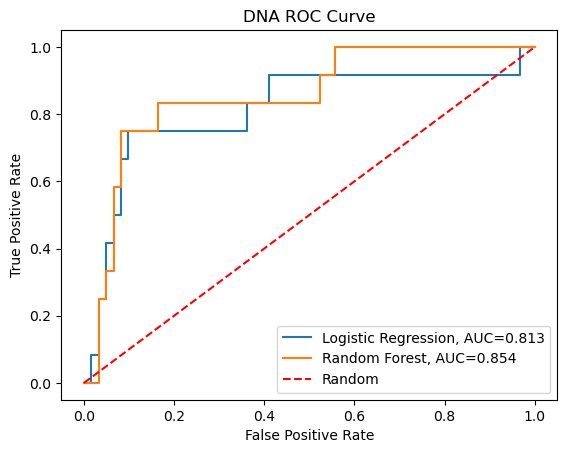

In [137]:
# dna
d_lr_probs = cross_val_predict(lr, X_dna, y_dna_binary, cv=cv, method='predict_proba')
d_lr_probs = d_lr_probs[:, 1]
d_lr_fpr, d_lr_tpr, _ = roc_curve(y_dna_binary, d_lr_probs)
d_lr_auc = auc(d_lr_fpr, d_lr_tpr)

plt.plot(d_lr_fpr, d_lr_tpr, label='Logistic Regression, AUC='+str(round(d_lr_auc, 3)))
plt.plot(d_rf_fpr, d_rf_tpr, label='Random Forest, AUC='+str(round(d_rf_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNA ROC Curve')
plt.legend()
plt.show()

## logistic regression with L2 penalty and nested cv

In [189]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
import numpy as np
from sklearn.metrics import auc, roc_auc_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV

In [190]:
# for rna

# assign cross validation and C values to test
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1

# for each outer fold, print the best C value and training/test AUC
for train_index, test_index in cv.split(X_rna, y_rna):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X_rna.loc[train_index], X_rna.loc[test_index]
    y_train, y_test = y_rna.loc[train_index], y_rna.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, cv=cv, scoring='roc_auc')     
    model.fit(x_train, y_train)

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))


NestedCV: 1 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 0.9747023809523809
    Test
        AUC: 1.0
  
    

NestedCV: 2 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.6666666666666667
  
    

NestedCV: 3 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 0.9717261904761905
    Test
        AUC: 0.9166666666666667
  
    

NestedCV: 4 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.8333333333333334
  
    

NestedCV: 5 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 0.972027972027972
    Test
        AUC: 1.0
  
    

NestedCV: 6 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 0.9692307692307693
    Test
        AUC: 1.0
  
    

NestedCV: 7 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 0.973901098901099
    Test
        AUC: 1.0
  
    

NestedCV: 8 of outer fold 10

    C va

In [191]:
# run nested cross validation
model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv)  

# predict class probabilities
rna_probs = cross_val_predict(model, X_rna, y_rna.values.ravel(), cv=cv, method='predict_proba')
rna_probs = rna_probs[:, 1]

rna_fpr, rna_tpr, _ = roc_curve(y_rna, rna_probs, pos_label='Positive')
rna_auc = auc(rna_fpr, rna_tpr)
print(rna_auc)

0.8179723502304147


In [192]:
# for agp

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1
for train_index, test_index in cv.split(X_agp, y_agp):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X_agp.loc[train_index], X_agp.loc[test_index]
    y_train, y_test = y_agp.loc[train_index], y_agp.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, cv=cv, scoring='roc_auc')     
    model.fit(x_train, y_train)

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))


NestedCV: 1 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.888888888888889
  
    

NestedCV: 2 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 3 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.9444444444444444
  
    

NestedCV: 4 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.6666666666666666
  
    

NestedCV: 5 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.6666666666666667
  
    

NestedCV: 6 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.9166666666666667
  
    

NestedCV: 7 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 8 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 1.0
    T

In [193]:
model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv)  

agp_probs = cross_val_predict(model, X_agp, y_agp.values.ravel(), cv=cv, method='predict_proba')
agp_probs = agp_probs[:, 1]

agp_fpr, agp_tpr, _ = roc_curve(y_agp, agp_probs, pos_label='Positive')
agp_auc = auc(agp_fpr, agp_tpr)
print(agp_auc)

0.7627118644067796


In [194]:
# for dna

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1
for train_index, test_index in cv.split(X_dna, y_dna):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X_dna.loc[train_index], X_dna.loc[test_index]
    y_train, y_test = y_dna.loc[train_index], y_dna.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, cv=cv, scoring='roc_auc')     
    model.fit(x_train, y_train)

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))


NestedCV: 1 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.6666666666666667
  
    

NestedCV: 2 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 3 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.7142857142857143
  
    

NestedCV: 4 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.33333333333333337
  
    

NestedCV: 5 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 6 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 0.9719008264462811
    Test
        AUC: 1.0
  
    

NestedCV: 7 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.6666666666666667
  
    

NestedCV: 8 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    

In [195]:
model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv)  

dna_probs = cross_val_predict(model, X_dna, y_dna.values.ravel(), cv=cv, method='predict_proba')
dna_probs = dna_probs[:, 1]

dna_fpr, dna_tpr, _ = roc_curve(y_dna, dna_probs, pos_label='Positive')
dna_auc = auc(dna_fpr, dna_tpr)
print(dna_auc)

0.76775956284153


## logistic regression with L1 penalty and nested cv

In [196]:
# for rna

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1
for train_index, test_index in cv.split(X_rna, y_rna):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X_rna.loc[train_index], X_rna.loc[test_index]
    y_train, y_test = y_rna.loc[train_index], y_rna.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, cv=cv, scoring='roc_auc', solver='liblinear', penalty='l1')     
    model.fit(x_train, y_train)

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))


NestedCV: 1 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9047619047619048
    Test
        AUC: 1.0
  
    

NestedCV: 2 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.8333333333333334
  
    

NestedCV: 3 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9092261904761905
    Test
        AUC: 1.0
  
    

NestedCV: 4 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.7500000000000001
  
    

NestedCV: 5 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 6 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9062937062937063
    Test
        AUC: 1.0
  
    

NestedCV: 7 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9093406593406593
    Test
        AUC: 1.0
  
    

NestedCV: 8 of outer fold 10

    C value: [0.1]
    
    Training
        AUC:

In [197]:
model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv, penalty='l1', solver='liblinear')  

rna_probs1 = cross_val_predict(model, X_rna, y_rna.values.ravel(), cv=cv, method='predict_proba')
rna_probs1 = rna_probs1[:, 1]

rna_fpr1, rna_tpr1, _ = roc_curve(y_rna, rna_probs1, pos_label='Positive')
rna_auc1 = auc(rna_fpr1, rna_tpr1)
print(rna_auc1)

0.8582949308755761


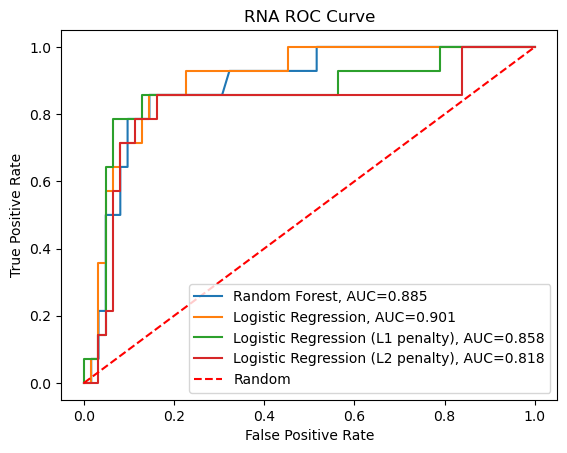

In [198]:
# plot all roc curves for RNA
plt.plot(r_rf_fpr, r_rf_tpr, label='Random Forest, AUC='+str(round(r_rf_auc, 3)))
plt.plot(r_lr_fpr, r_lr_tpr, label='Logistic Regression, AUC='+str(round(r_lr_auc, 3)))
plt.plot(rna_fpr1, rna_tpr1, label='Logistic Regression (L1 penalty), AUC='+str(round(rna_auc1, 3)))
plt.plot(rna_fpr, rna_tpr, label='Logistic Regression (L2 penalty), AUC='+str(round(rna_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNA ROC Curve')
plt.legend(loc='lower right')
plt.savefig('roc_rna.png')
plt.show()

In [199]:
# for agp

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1
for train_index, test_index in cv.split(X_agp, y_agp):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X_agp.loc[train_index], X_agp.loc[test_index]
    y_train, y_test = y_agp.loc[train_index], y_agp.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, cv=cv, scoring='roc_auc', solver='liblinear', penalty='l1')     
    model.fit(x_train, y_train)

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))


NestedCV: 1 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.8571428571428571
    Test
        AUC: 0.9444444444444444
  
    

NestedCV: 2 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.8652291105121293
    Test
        AUC: 1.0
  
    

NestedCV: 3 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.8858939802336029
    Test
        AUC: 1.0
  
    

NestedCV: 4 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.8941798941798941
    Test
        AUC: 0.8666666666666667
  
    

NestedCV: 5 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9133790737564322
    Test
        AUC: 0.5833333333333334
  
    

NestedCV: 6 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 7 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.8979416809605488
    Test
        AUC: 0.7500000000000001
  
    

NestedCV: 8 of ou

In [200]:
model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv, penalty='l1', solver='liblinear')  

agp_probs1 = cross_val_predict(model, X_agp, y_agp.values.ravel(), cv=cv, method='predict_proba')
agp_probs1 = agp_probs1[:, 1]

agp_fpr1, agp_tpr1, _ = roc_curve(y_agp, agp_probs1, pos_label='Positive')
agp_auc1 = auc(agp_fpr1, agp_tpr1)
print(agp_auc1)

0.8022598870056498


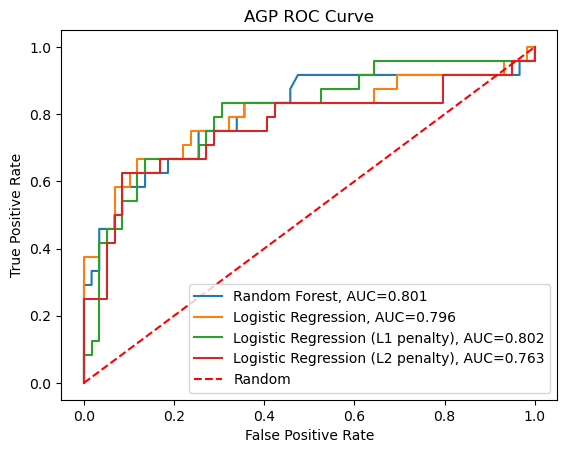

In [201]:
# plot all roc curves for AGP
plt.plot(a_rf_fpr, a_rf_tpr, label='Random Forest, AUC='+str(round(a_rf_auc, 3)))
plt.plot(a_lr_fpr, a_lr_tpr, label='Logistic Regression, AUC='+str(round(a_lr_auc, 3)))
plt.plot(agp_fpr1, agp_tpr1, label='Logistic Regression (L1 penalty), AUC='+str(round(agp_auc1, 3)))
plt.plot(agp_fpr, agp_tpr, label='Logistic Regression (L2 penalty), AUC='+str(round(agp_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AGP ROC Curve')
plt.legend(loc='lower right')
plt.savefig('roc_agp.png')
plt.show()

In [202]:
# for dna

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1
for train_index, test_index in cv.split(X_dna, y_dna):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X_dna.loc[train_index], X_dna.loc[test_index]
    y_train, y_test = y_dna.loc[train_index], y_dna.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, cv=cv, scoring='roc_auc', penalty='l1', solver='liblinear')     
    model.fit(x_train, y_train)

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))


NestedCV: 1 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.7927272727272727
    Test
        AUC: 0.6666666666666667
  
    

NestedCV: 2 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 3 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.8720538720538721
    Test
        AUC: 0.1428571428571429
  
    

NestedCV: 4 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.33333333333333337
  
    

NestedCV: 5 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.0
  
    

NestedCV: 6 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.8809917355371901
    Test
        AUC: 1.0
  
    

NestedCV: 7 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.8333333333333334
  
    

NestedCV: 8 of outer fold 10

    C value: [1.]
    
    Trainin

In [203]:
model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv, penalty='l1', solver='liblinear')  

dna_probs1 = cross_val_predict(model, X_dna, y_dna.values.ravel(), cv=cv, method='predict_proba')
dna_probs1 = dna_probs1[:, 1]

dna_fpr1, dna_tpr1, _ = roc_curve(y_dna, dna_probs1, pos_label='Positive')
dna_auc1 = auc(dna_fpr1, dna_tpr1)
print(dna_auc1)

0.6612021857923498


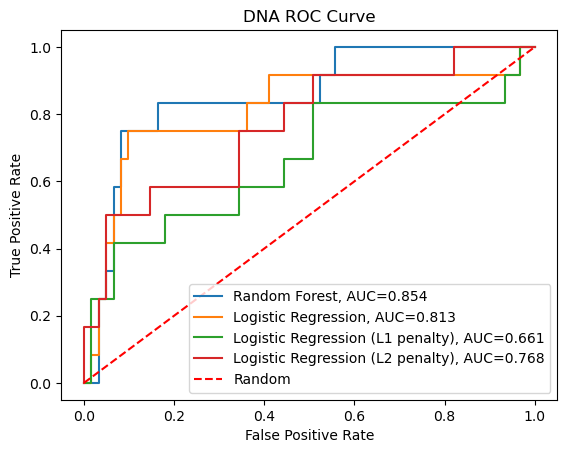

In [204]:
# plot all roc curves for DNA
plt.plot(d_rf_fpr, d_rf_tpr, label='Random Forest, AUC='+str(round(d_rf_auc, 3)))
plt.plot(d_lr_fpr, d_lr_tpr, label='Logistic Regression, AUC='+str(round(d_lr_auc, 3)))
plt.plot(dna_fpr1, dna_tpr1, label='Logistic Regression (L1 penalty), AUC='+str(round(dna_auc1, 3)))
plt.plot(dna_fpr, dna_tpr, label='Logistic Regression (L2 penalty), AUC='+str(round(dna_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNA ROC Curve')
plt.legend(loc='lower right')
plt.savefig('roc_dna.png')
plt.show()